In [13]:
from simtool.serving import ModelServer
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
from simtool.dataloader import pil_loader, create_dataloader
import numpy as np
from utils.helpers import read_config
from pathlib import Path
%matplotlib inline

In [2]:
server = ModelServer('../config/deploy.json')
path = '/s/mlsc/abake116/geodata/test/marble/KO5OR.jpg'
nbrs = server.query_topk('/s/mlsc/abake116/geodata/eval',16)
#nbrs = server.query_topk(path, 16)

In [23]:
img = pil_loader(path)

In [ ]:
img.resize((256,256))

In [ ]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = np.array(pil_loader(nbrs[0][i-1][0]))
    fig.add_subplot(rows, columns, i).set_title("Distance: {0:.5f}".format(nbrs[0][i-1][1]))
    plt.imshow(img)
plt.show()

In [9]:
config = read_config('../config/deploy.json')

In [10]:
config

{'model_path': '/s/mlsc/abake116/geologs/RESNET_L111_S2_E128_SELU_BASIC_BS32_GN/checkpoints/best.pt',
 'gpus': [],
 'embedding_path': '/s/mlsc/abake116/geodata/embeddings/train',
 'model_args': {'in_features': 3,
  'nonlinearity': 'selu',
  'initial_channels': 32,
  'strides': [2, 2, 2],
  'blocks': [1, 1, 1],
  'padding': [1, 1, 1],
  'kernels': [3, 3, 3],
  'norm': 'groupnorm',
  'group_size': 8,
  'embedding_dim': 128,
  'block': 'basic',
  'num_classes': 6},
 'data': {'loader': {'batch_size': 32,
   'shuffle': False,
   'num_workers': 2,
   'pin_memory': True},
  'transforms': {'tensor': {},
   'normalize': {'mean': [8.1333, 8.3175, 8.3151],
    'std': [1.1967, 1.5118, 1.5296]}}}}

In [11]:
dl = create_dataloader('/s/mlsc/abake116/geodata/eval',config['data'])

In [12]:
dl.dataset.imgs

[('/s/mlsc/abake116/geodata/eval/andesite/02V0N.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/03OSJ.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/05KA0.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/05S8U.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0DG4N.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0ILM1.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0K7K7.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0KD1O.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0L488.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0OL01.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0V571.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/0VT1X.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/10NFI.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/17J3P.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/18HPL.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/1ATXZ.jpg', 1),
 ('/s/mlsc/abake116/geodata/eval/andesite/1CC0L.jpg', 1),
 ('/s/mlsc/aba

#### Explore Recall

In [16]:
for n in nbrs[0]:
    print(n)

('/s/mlsc/abake116/geodata/train/andesite/02V0N.jpg', -1.1920929e-07)
('/s/mlsc/abake116/geodata/train/andesite/X2IHG.jpg', 0.016607583)
('/s/mlsc/abake116/geodata/train/andesite/MVVE9.jpg', 0.018496394)
('/s/mlsc/abake116/geodata/train/andesite/PSZHL.jpg', 0.02131623)
('/s/mlsc/abake116/geodata/train/andesite/1RSUM.jpg', 0.023322344)
('/s/mlsc/abake116/geodata/train/andesite/5YNBR.jpg', 0.025114477)
('/s/mlsc/abake116/geodata/train/andesite/H6PJO.jpg', 0.02575183)
('/s/mlsc/abake116/geodata/train/andesite/QDM91.jpg', 0.026587188)
('/s/mlsc/abake116/geodata/train/andesite/R0V8M.jpg', 0.026899755)
('/s/mlsc/abake116/geodata/train/andesite/LCWOC.jpg', 0.027284503)
('/s/mlsc/abake116/geodata/train/andesite/BDU3J.jpg', 0.027595818)
('/s/mlsc/abake116/geodata/train/andesite/6RELB.jpg', 0.031304717)
('/s/mlsc/abake116/geodata/train/andesite/3GH25.jpg', 0.031650543)
('/s/mlsc/abake116/geodata/train/andesite/52746.jpg', 0.032128572)
('/s/mlsc/abake116/geodata/train/andesite/H3C26.jpg', 0.03285

In [17]:
correct = 0
total = 0
multiclass_idx = []
for i in range(len(nbrs)):
    label = Path(dl.dataset.imgs[i][0]).parts[-2]
    multiclass = False
    for n in nbrs[i]:
        total += 1
        target_label = Path(n[0]).parts[-2]
        if label == target_label:
            correct +=1
        else:
            multiclass = True
    if multiclass:
        multiclass_idx.append(i)
        
        
        

In [28]:
img = np.array(pil_loader(dl.dataset.imgs[multiclass_idx[0]][0]))

In [ ]:
plt.imshow(img)

In [59]:
def plot_nbrs(nbrs):
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        img = np.array(pil_loader(nbrs[i-1][0]))
        label = Path(nbrs[i-1][0]).parts[-2]
        fig.add_subplot(rows, columns, i).set_title("Class {s}, Dist: {f:.5f}".format(s=label,f=nbrs[i-1][1]))
        plt.imshow(img)
    plt.show()

In [49]:
print( "{s}  ¦  {f:.2f}".format(s='hello', f=0.234235234234234))

hello  ¦  0.23


In [ ]:
img = np.array(pil_loader([i-1][0]))

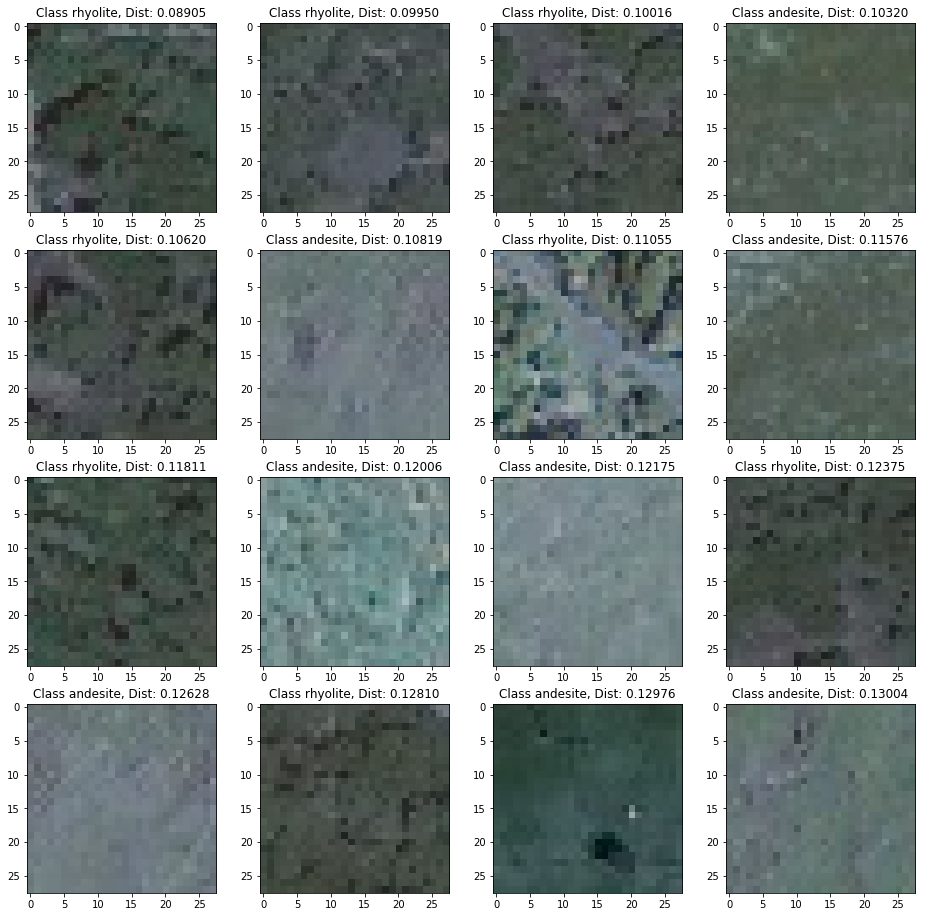

In [60]:
plot_nbrs(nbrs[multiclass_idx[0]])